## Course: TM10007 - Machine learning
Editors: Lishia Vergeer, Amy Roos, Maaike Pruijt, Hilde Roording.

Description: The aim of this code is to predict the tumor grade of glioma’s(high or low) before surgery, 
based on features extracted from a combination of four MRI images: 
T2-weighted, T2-weighted FLAIR and T1-weighted before and after injection of contrast agent.

#### Import packages

In [28]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn as sns

# Import code
from brats.load_data import load_data

# Performance 
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import seaborn
from matplotlib import pyplot as plt


# Pipeline and gridsearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# scaler
from sklearn.preprocessing import RobustScaler



#Machine learning classifiers
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import ShuffleSplit

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor



#### Load data

In [29]:
data_brats = load_data()

# Convert to dataframe
X = pd.DataFrame(data_brats)

# Print data 
print(f'The number of samples in data_brats: {len(X.index)}')
print(f'The number of columns in data_brats: {len(X.columns)}')

The number of samples in data_brats: 167
The number of columns in data_brats: 725


c:\Users\Lishia\Documents\Jaar_1\TM10007 - Machine Learning\Repositories\TM10007\brats\load_data.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)


#### Split data in X and y
Split in X (data) and y (label)

In [30]:
# split column label from dataset X
y = X.pop('label')
print (y)

ID
TCGA-02-0006    GBM
TCGA-02-0009    GBM
TCGA-02-0011    GBM
TCGA-02-0027    GBM
TCGA-02-0033    GBM
               ... 
TCGA-HT-8018    LGG
TCGA-HT-8111    LGG
TCGA-HT-8114    LGG
TCGA-HT-8563    LGG
TCGA-HT-A61A    LGG
Name: label, Length: 167, dtype: object


#### Split data in train and test set
This function creates a panda dataframe and splits the data into test and train components.
This is done with test_size variable and the function train_test_split from the sklearn module.
Returns a train set with the data of 80% and a test set of 20% of the subjects.



In [31]:
# Split data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)  


#### Divergent values to NaN

In [32]:

# infinity to NaN
X_train[X_train==np.inf]=np.nan
X_test[X_test==np.inf]=np.nan

# non-numeric features to NaN
X_train = X_train.replace(['#DIV/0!'], np.nan)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

X_test  = X_test.replace(['#DIV/0!'], np.nan)
X_test = X_test.apply(pd.to_numeric, errors='coerce')



#### Visualising outliers

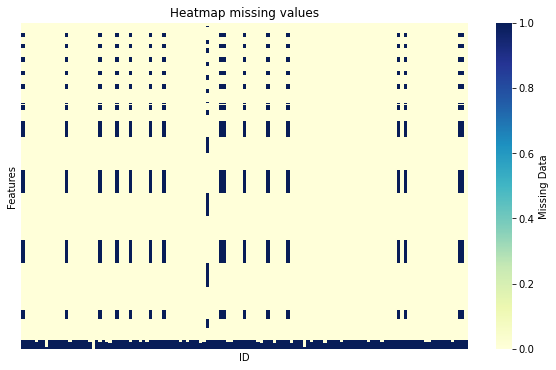

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna().transpose(),
            yticklabels=False, xticklabels=False, 
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.title('Heatmap missing values')
plt.ylabel('Features')
plt.xlabel('ID')
plt.savefig("visualizing_missing_data_with_heatmap.png", dpi=100)


#### Outliers to NaN



In [34]:
for column in X_train:
    # Removing outliers
    q1 = X_train[column].quantile(0.25)
    q3 = X_train[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print(column)

    # Information outliers
    outliers = [x for x in X_train[column] if x < lower or x > upper]
    outliers_removed = [x for x in X_train[column] if x >= lower and x <= upper]
    print('Identified outliers: %d' % len(outliers))
    print('Non-outlier observations: %d' % len(outliers_removed))


    X_train[column].loc[X_train[column] > upper] = np.nan
    X_train[column].loc[X_train[column] < lower] = np.nan

VOLUME_ET
Identified outliers: 3
Non-outlier observations: 130
VOLUME_NET
Identified outliers: 9
Non-outlier observations: 124
VOLUME_ED
Identified outliers: 3
Non-outlier observations: 130
VOLUME_TC
Identified outliers: 3
Non-outlier observations: 130
VOLUME_WT
Identified outliers: 1
Non-outlier observations: 132


C:\Users\Lishia\AppData\Local\Temp\ipykernel_24636\692173909.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column].loc[X_train[column] > upper] = np.nan


VOLUME_BRAIN
Identified outliers: 3
Non-outlier observations: 130
VOLUME_ET_OVER_NET
Identified outliers: 14
Non-outlier observations: 119
VOLUME_ET_OVER_ED
Identified outliers: 4
Non-outlier observations: 128
VOLUME_NET_OVER_ED
Identified outliers: 15
Non-outlier observations: 117
VOLUME_ET_over_TC
Identified outliers: 0
Non-outlier observations: 133
VOLUME_NET_over_TC
Identified outliers: 0
Non-outlier observations: 133
VOLUME_ED_over_TC
Identified outliers: 13
Non-outlier observations: 120
VOLUME_ET_OVER_WT
Identified outliers: 0
Non-outlier observations: 133
VOLUME_NET_OVER_WT
Identified outliers: 1
Non-outlier observations: 132
VOLUME_ED_OVER_WT
Identified outliers: 0
Non-outlier observations: 133
VOLUME_TC_OVER_WT
Identified outliers: 0
Non-outlier observations: 133
VOLUME_ET_OVER_BRAIN
Identified outliers: 4
Non-outlier observations: 129
VOLUME_NET_OVER_BRAIN
Identified outliers: 8
Non-outlier observations: 125
VOLUME_ED_over_BRAIN
Identified outliers: 2
Non-outlier observations

#### Visualising missing data after removing outliers

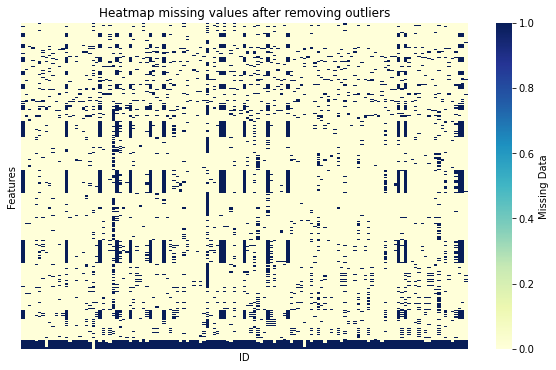

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna().transpose(),
            yticklabels=False, xticklabels=False, 
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.title('Heatmap missing values after removing outliers')
plt.ylabel('Features')
plt.xlabel('ID')
plt.savefig("visualizing_missing_data_with_heatmap_outliers.png", dpi=100)

#### Drop columns

In [36]:
# If the total number of NaN observations in a column are greater than 40%, delete the entire column.
perc = 40.0
min_count = int(((100-perc)/100)*X_train.shape[0] + 1)
X_train_drop = X_train.dropna(axis=1, thresh=min_count)
X_labels = X_train_drop.keys()

X_test_drop = X_test[X_labels]

#### Fill the NaN observations.


In [37]:
data_fill_train = X_train_drop.fillna(X_train_drop.mean()) 
data_fill_test = X_test_drop.fillna(X_test_drop.mean()) 

#### Scale features

In [38]:
# Scaler
scaler = MinMaxScaler()
scaler.fit(data_fill_train)
X_train_scaled = scaler.transform(data_fill_train)
X_test_scaled = scaler.transform(data_fill_test)

#### Transform features

In [39]:
# Perform a PCA
pca = decomposition.PCA(n_components=5)
pca.fit(X_train_scaled) 
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_test_pca)

[[ 9.58339244e-01  1.53935518e+00  1.74384484e+00 -1.76086490e+00
   3.45849580e-01]
 [-3.37397093e+00 -1.84644645e-01 -5.02722942e-01  3.78359051e-01
   3.76418738e-01]
 [ 7.43497780e+00  6.98531271e+00  6.36070594e+00  2.03722781e+01
  -2.58666129e+00]
 [-5.44093720e+00 -1.13112075e+00  1.67029171e+00 -1.14109681e+01
  -6.08383397e+00]
 [-3.87082463e+00 -1.75839016e+00  7.32157508e-02 -7.80234601e+00
  -5.25078128e+00]
 [-4.35437279e+00  9.53720883e+00  2.83825846e-01  1.03390698e+00
   4.47088161e+00]
 [-6.05115063e-01  2.95141984e+00  7.98600765e-01  6.41649234e-02
  -1.33776251e+00]
 [-8.15598642e-01  3.19947105e+00 -2.63032063e+00  1.56577014e+00
   7.67608398e-02]
 [ 5.31277331e+00  4.40563331e+00 -2.88764037e-01  2.99409189e+00
   2.41201735e+00]
 [-1.14299667e+00  2.52395782e+00  2.63477284e-01  4.27636087e-01
   1.04399809e+00]
 [ 6.13053550e+00  2.59684874e+00 -9.92697478e-01  1.31006063e+00
   1.45183065e+00]
 [-6.56613225e+00  5.44905826e+00  1.44977660e+00  6.53222577e+00

#### Cross validation

In [40]:
# Create a cross-validation object
cv = KFold(n_splits=5, shuffle= True, random_state = 1)

X = X_train_pca

y = y_train.values
y = np.where(y=='GBM', 1, y)
y = np.where(y=='LGG', 0, y)
y = y.tolist()

classifiers = (KNeighborsClassifier(), RandomForestClassifier(), SVC(kernel="rbf", C=0.025, probability=True), NuSVC(probability=True), DecisionTreeClassifier(), AdaBoostClassifier(), GradientBoostingClassifier() )

for cls in classifiers:

    list_scores = cross_val_score(cls, X, y, scoring = 'accuracy', cv=cv)
    mean = np.mean(list_scores)

    print(list_scores)
    print(f'{cls} mean:', mean)
  

[0.77777778 0.77777778 0.92592593 0.80769231 0.88461538]
KNeighborsClassifier() mean: 0.8347578347578348
[0.77777778 0.85185185 0.92592593 0.73076923 0.92307692]
RandomForestClassifier() mean: 0.8418803418803419
[0.44444444 0.74074074 0.74074074 0.53846154 0.61538462]
SVC(C=0.025, probability=True) mean: 0.6159544159544159
[0.77777778 0.85185185 0.92592593 0.80769231 0.92307692]
NuSVC(probability=True) mean: 0.8572649572649574
[0.7037037  0.7037037  0.92592593 0.65384615 0.76923077]
DecisionTreeClassifier() mean: 0.7512820512820513
[0.77777778 0.74074074 0.92592593 0.65384615 0.92307692]
AdaBoostClassifier() mean: 0.8042735042735043
[0.77777778 0.77777778 0.92592593 0.76923077 0.92307692]
GradientBoostingClassifier() mean: 0.8347578347578347


#### Classifier

In [41]:
# Construct classifiers
clsfs = [RandomForestClassifier(n_estimators=1, random_state=42),
         RandomForestClassifier(n_estimators=5, random_state=42),
         RandomForestClassifier(n_estimators=200, random_state=42)]